In [1]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_state:str


In [9]:
def first_node(state):
    print("My First Node is called")
    return {"graph_state":state['graph_state']+"I am playing"}

def second_node(state):
    print("My Second Node is called")
    return {"graph_state":state['graph_state']+" Cricket"}


def third_node(state):
    print("My Third Node is called")
    return {"graph_state":state['graph_state']+" Badminton"}


In [4]:
import random
from typing import Literal

def decide_play(state)->Literal['second_node','third_node']:
    graph_state=state['graph_state']

    if random.random()<0.5:
        return "second_node"
    
    return "third_node"


## Graph 

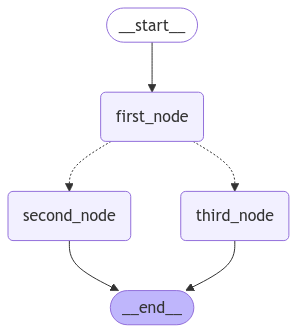

In [11]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## Build Graph
builder=StateGraph(State)

builder.add_node("first_node",first_node)
builder.add_node("second_node",second_node)
builder.add_node("third_node",third_node)

## Logic
builder.add_edge(START,"first_node")
builder.add_conditional_edges("first_node",decide_play)
builder.add_edge("second_node",END)
builder.add_edge("third_node",END)

## Add
graph=builder.compile()

## View
display(Image(graph.get_graph().draw_mermaid_png()))


In [14]:
graph.invoke({"graph_state":"Hi,My name is Krish,"})

My First Node is called
My Second Node is called


{'graph_state': 'Hi,My name is Krish,I am playing Cricket'}

### Basic Chatbot

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]


In [3]:
graph_builder=StateGraph(State)

In [4]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [5]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000236EB3E59D0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000236EB37C6B0>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [7]:
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()


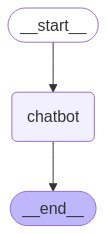

In [8]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

In [25]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Hi! 👋 

How can I help you today? 😊

Assistant: Generative AI is a fascinating field of artificial intelligence focused on creating new content. 

Think of it like this: instead of simply processing and understanding existing data, generative AI learns the underlying patterns and structures within that data and uses that knowledge to generate something entirely new. 

Here's a breakdown:

**What it does:**

* **Creates text:** Write stories, poems, articles, dialogue, even code!
* **Generates images:** Produce realistic photos, artwork, illustrations, and designs.
* **Composes music:**  Craft melodies, harmonies, and entire musical pieces.
* **Synthesizes audio:**  Generate realistic speech, sound effects, and voiceovers.
* **Builds 3D models:** Design objects and environments in virtual space.

**How it works:**

Generative AI models are typically trained on massive datasets of existing content. This allows them to learn the statistical relationships between different eleme